<a href="https://colab.research.google.com/github/Finix-07/pytorch_practice/blob/main/pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

Machine learning is a game of two parts:

    Turn your data, whatever it is, into numbers (a representation).
    Pick or build a model to learn the representation as best as possible.

Sometimes one and two can be done at the same time.

But what if you don't have data?

Well, that's where we're at now.

No data.

But we can create some.

Let's create our data as a straight line.

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [55]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # used to add extra dimension to our tensor so that it shows vertically instead of showing in a single row
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [56]:
len(X) , len(y) # X-> tensor , y-> vector

(50, 50)

### Splitting the data into training and test sets (one of the most concepts in ML in general)

 let's create training sets with our data

In [57]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# we can also use scikit lean's split method to split the test

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

this is where the data explorer's motto comes in!

In [58]:
import matplotlib.pyplot as plt
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s = 4, label ="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot predictions in red (predictions in the future)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show legend
  plt.legend(prop={"size": 14});

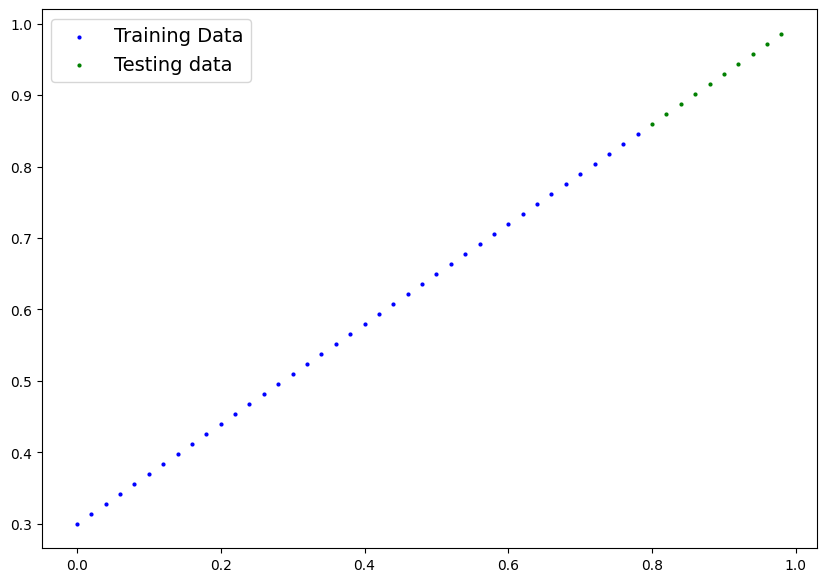

In [59]:
plot_predictions()


 # Build Model
 our first PyTorch model!

What our model does:
* Start with random values for weights and bias
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values

How does it do so?

Through 2 main algorithms
1. Gradient descent
2. Backpropogation

In [60]:
# create linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()

    #initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True, # means we will track the gradients
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

    #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is our linear regression formula



### PyTorch model building essentials

* torch.nn - contains all the building blocks for computational graphs( a nn can be computationnal graphs)
* torch.nn.Parameters - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if u subclass itm you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - all nn.Module subclasses require your to overwrite this method, this is where the computation takes place

### Checking the contents of our pytorch model

now we have the model lets see its contents

so we can check our model parameters in our model using .parameters()

In [61]:
# Create a random seed
torch.manual_seed(42)

#create an instance of the model (this is subclass of nn.Module)
model_0 = LinearRegressionModel()

#check our the parameters
list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [62]:
# list named parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

to check our model's predictive power, lets see how well it predicts y_tests based on X_test.



In [63]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [64]:
# make predictions with model
with torch.inference_mode(): # this is used to disable all the usefull stuff required druing training and irrelevant during predictions, fore example keeping track of the gradient
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

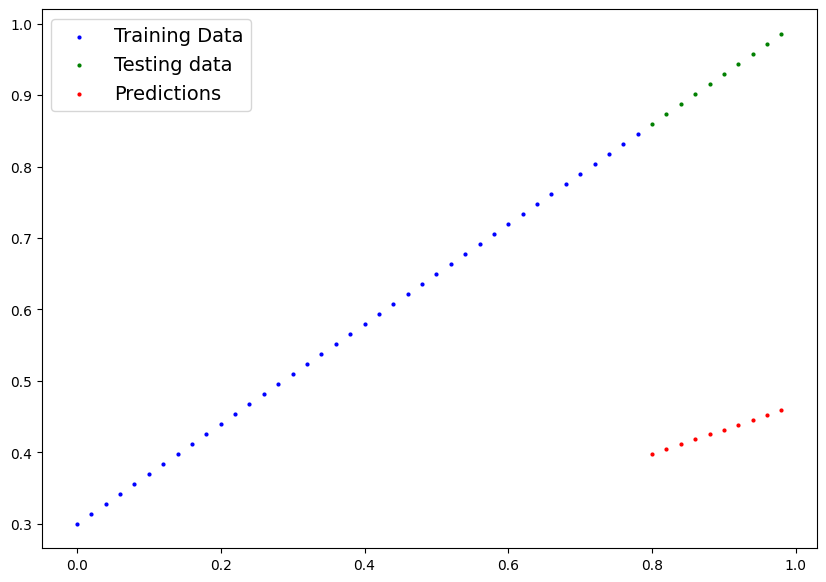

In [65]:
plot_predictions(predictions = y_preds)

## 3. Train model

The whole idea of training is for a model  to move from some unknown parameters to known parameters

or in others words poor representation to a better representation of the data.

One way to measure how wrong model is to use a loss functions.

* Note: Loss function == cost function == criterion == objective function

things needed to train:

* **Loss function** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **Optimizer** A function that helps adjust the parameters to try and improve the loss function

And specifically for Pytorch we need:
* A training loop
* A testing loop

In [66]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [67]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1 loss

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01 ) #lr = learning rate

### Building a training loop (and a testing loop) in Pytorch

A couple of things we need in a training loop:

0. Loop Through the data
1. Forward pass (this involves data moving through our model's `forward()` functions.
2. Calculate the loss (compare forward pass predictions to ground truth labers)
3. Optimizer zero grad
4. Loss Backward - moves backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient descent**)

In [68]:
import numpy as np

In [69]:
torch.manual_seed(42)
# An epoch is one loop through the data...
epochs = 200

# Track diff values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in Pytorch set all parameters that require gradients to require gradients


  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) #(what it is, what it has to be)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (do gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() # turn off different settings in model that are not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode():
    #1. Do forward pass
    test_pred = model_0(X_test)

    #2. calculate loss
    test_loss = loss_fn(test_pred, y_test) #(what it is, what it has to be)

  if epoch % 10 == 0:
    epoch_count.append(np.array(torch.tensor(epoch).numpy()))
    loss_values.append(np.array(torch.tensor(loss).numpy()))
    test_loss_values.append(np.array(torch.tensor(test_loss).numpy()))

    # Print out what's happening

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} ")
    # Print out model state_dict()

    print(model_0.state_dict())

<ipython-input-69-194cc00aefe2>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss_values.append(np.array(torch.tensor(loss).numpy()))
<ipython-input-69-194cc00aefe2>:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss_values.append(np.array(torch.tensor(test_loss).numpy()))


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135 
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

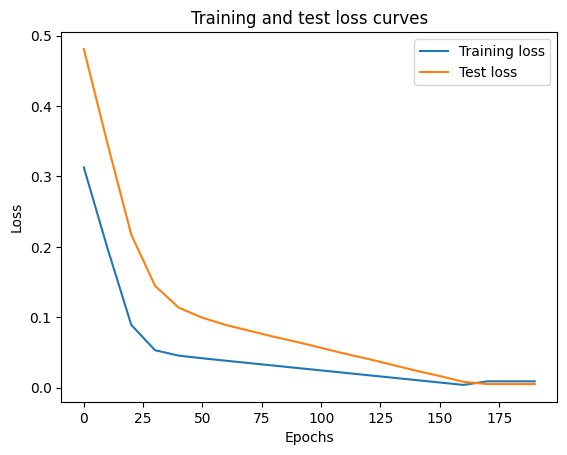

In [70]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label = "Training loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [71]:
with torch.inference_mode(): # this is used to disable all the usefull stuff required druing training and irrelevant during predictions, fore example keeping track of the gradient
  y_preds_new = model_0(X_test)

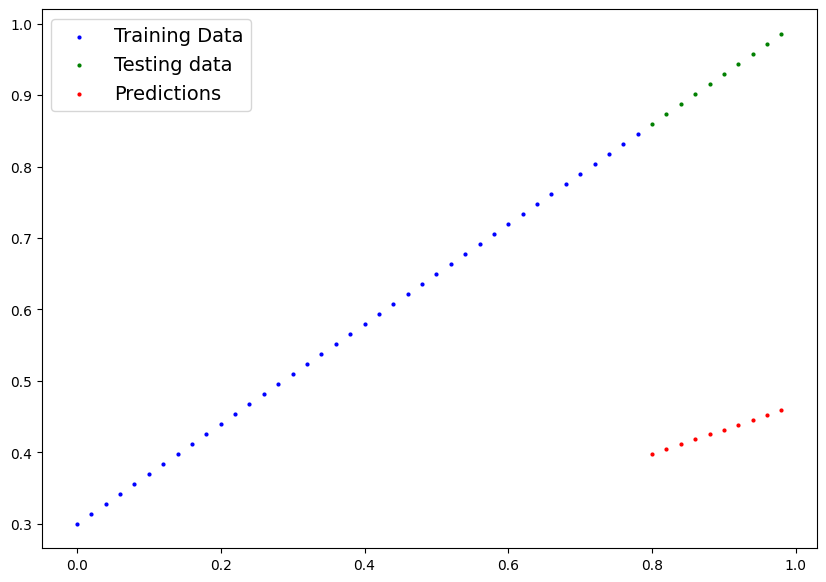

In [72]:
plot_predictions(predictions = y_preds.detach().numpy())

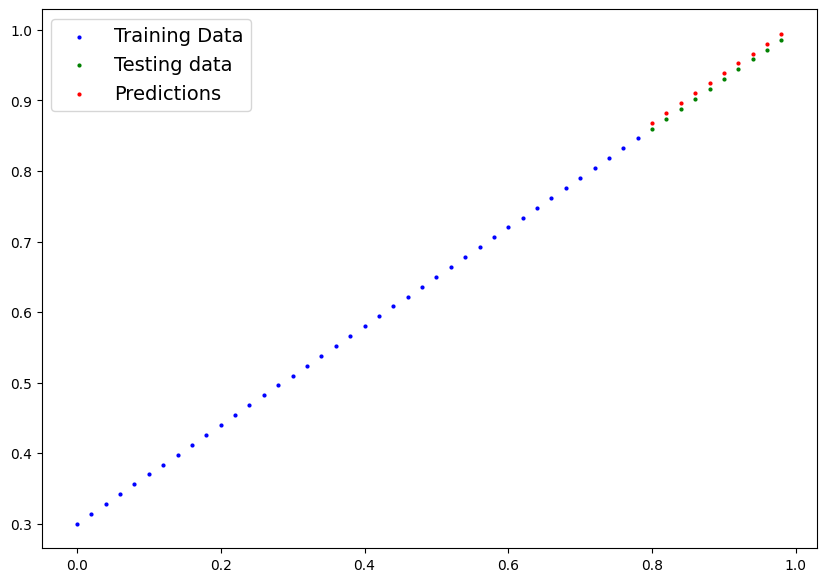

In [73]:
plot_predictions(predictions = y_preds_new)

## Saving a model in PyTorch

Threre are 3 main methods for saving and loading models in PyTorch.

1. `torch.save()`- allows to save a PyTorch object in Python's pickle format
2. `torch.load()`- allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()`- This allows you to load a model's saved state dictionary

In [74]:
# Saving our pytorch model

from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [75]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Oct  7 05:28 01_pytorch_workflow_model.pth


## Loading a PyTorch model

Since we saved a pytorch model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saves `state_dict()` into that

In [76]:
# To load in a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-76-bc81f20c8a71>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [77]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [78]:
# Make some predictions with our loaded mode
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [79]:
# compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### New Model New Preds

In [80]:
weight = 0.3
bias = 0.9

In [81]:
start = 0
end = 1
step = 0.02
new_X = torch.arange(start, end, step).unsqueeze(dim=1)
new_y = weight * new_X + bias

In [82]:
train_split = int(0.8 * len(new_X)) # 80% of data
new_X_train = new_X[:train_split]
new_X_test = new_X[train_split:]
new_y_train = new_y[:train_split]
new_y_test = new_y[train_split:]


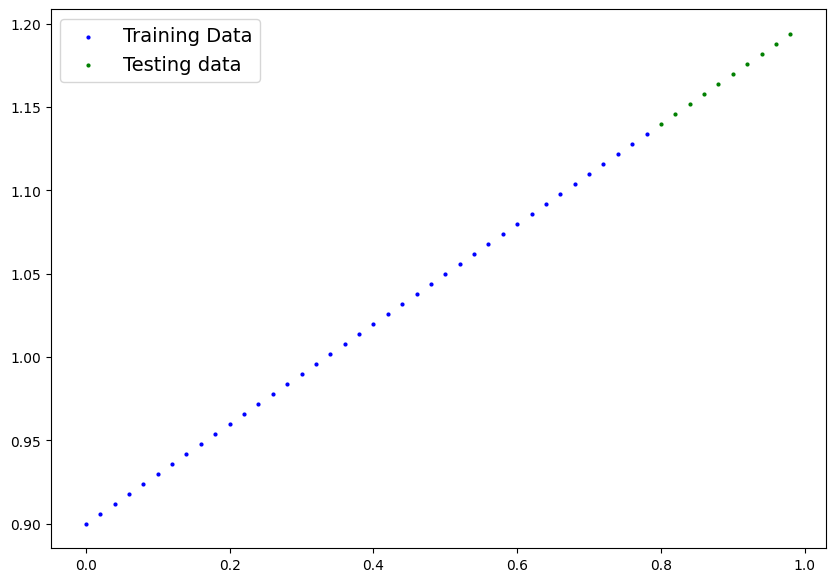

In [83]:
plot_predictions(train_data = new_X_train, train_labels = new_y_train, test_data = new_X_test, test_labels = new_y_test)

In [84]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1) # this will give us a layer which takes 1 input feature and outputs 1 feature

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.linear_layer(x)



In [85]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [86]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [87]:
# making train/test loop

epochs = 1000

epoch_count = []
train_loss = []
test_loss = []

for epoch in range(epochs):

  # 0. Put in training mode
  model_1.train()

  # 1. forward pass
  y_preds_new = model_1(new_X_train)

  # 2. Calculate the loss
  TrainLoss = loss_fn(y_preds_new, new_y_train)

  # 3. Remove accumulated gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  TrainLoss.backward()

  # 5. optimizer the parameters
  optimizer.step()

  # now testing loop

  # 0. set in evaluation mode
  model_1.eval()

  with torch.inference_mode():
    # 1. do forward pass
    test_pred = model_1(new_X_test)

    # 2. Calculate the loss
    loss_pred = loss_fn(test_pred, new_y_test)

  if epoch % 100 == 0:
    epoch_count.append(epoch)
    train_loss.append(TrainLoss)
    test_loss.append(loss_pred)

    print(f"Epoch: {epoch} | Training Loss: {TrainLoss} | Testing Loss: {loss_pred}")



Epoch: 0 | Training Loss: 0.12616769969463348 | Testing Loss: 0.33422544598579407
Epoch: 100 | Training Loss: 0.051440197974443436 | Testing Loss: 0.11986131966114044
Epoch: 200 | Training Loss: 0.01710296794772148 | Testing Loss: 0.03919823095202446
Epoch: 300 | Training Loss: 0.007012799382209778 | Testing Loss: 0.003249275730922818
Epoch: 400 | Training Loss: 0.007012799382209778 | Testing Loss: 0.003249275730922818
Epoch: 500 | Training Loss: 0.007012799382209778 | Testing Loss: 0.003249275730922818
Epoch: 600 | Training Loss: 0.007012799382209778 | Testing Loss: 0.003249275730922818
Epoch: 700 | Training Loss: 0.007012799382209778 | Testing Loss: 0.003249275730922818
Epoch: 800 | Training Loss: 0.007012799382209778 | Testing Loss: 0.003249275730922818
Epoch: 900 | Training Loss: 0.007012799382209778 | Testing Loss: 0.003249275730922818


In [88]:
print(f"Model learned the following values:\n {model_1.state_dict()}")
weight , bias

Model learned the following values:
 OrderedDict([('linear_layer.weight', tensor([[0.3064]])), ('linear_layer.bias', tensor([0.9045]))])


(0.3, 0.9)

In [89]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(new_X_test)


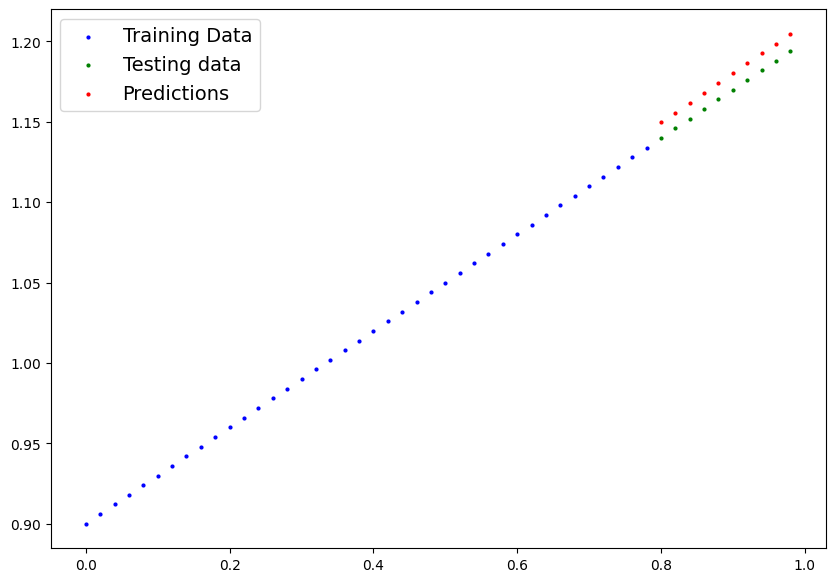

In [90]:
plot_predictions(train_data = new_X_train, train_labels = new_y_train, test_data = new_X_test, test_labels = new_y_test, predictions = y_preds)

In [91]:
# saving the model
from pathlib import Path

# 1. Making a path
model_path = Path("Models")
model_path.mkdir(parents = True, exist_ok = True)

model_name = "model_1.pth"
model_save_path = model_path / model_name

torch.save(model_1.state_dict(), model_save_path)

In [92]:
# loading the model

model_1_copy = LinearRegressionModelV2()
model_1_copy.load_state_dict(torch.load(model_save_path))

model_1.state_dict() , model_1_copy.state_dict()

<ipython-input-92-bdc519faf0c2>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1_copy.load_state_dict(torch.load(model_save_path))


(OrderedDict([('linear_layer.weight', tensor([[0.3064]])),
              ('linear_layer.bias', tensor([0.9045]))]),
 OrderedDict([('linear_layer.weight', tensor([[0.3064]])),
              ('linear_layer.bias', tensor([0.9045]))]))

In [93]:
model_1_copy.eval()

with torch.inference_mode():
  y_preds_copy = model_1_copy(new_X_test)

In [94]:
y_preds_copy == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [95]:
# DONE